- oil (1982/8/20 ~ 今 )
- 用6個數值預測隔週存貨漲跌
- 前80%做training set (非亂數)
- SVM 2元分類
- 指標值分2類

In [1]:
import numpy as np
import pandas as pd
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [2]:
filename = "../dataset/weekly_supply_estimates_19820820.csv"
df = pd.read_csv(filename)
Y_all = df['Label_D6-AB'].values
X_all = df.drop(['Date','D6-D','D6-E','D6-AB','Label_D6-E','Label_D6-S','Label_D6-AB'], 1)
X_all = np.array(X_all)
Y_all = np.array(Y_all)
print(X_all.shape)
print(Y_all.shape)

(1899, 6)
(1899,)


In [3]:
def train_predict(x_all,y_all):
    test_size = 0.2
    train_size = int(len(x_all)*(1-test_size))
    X_train = x_all[0:train_size] 
    X_test = x_all[train_size:]
    y_train = y_all[0:train_size]
    y_test = y_all[train_size:]
    X_train, XX_test, y_train, yy_test = train_test_split(X_train, y_train, test_size=0, random_state=42)
    #X_train, X_test, y_train, y_test = train_test_split(x_all, y_all, test_size=0.2, random_state=42)
    print(X_train.shape)
    print(X_test.shape)
    #clf = SVC() 
    clf = RandomForestClassifier(criterion='entropy',n_estimators=300,max_depth=9, random_state=0)
    print( "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)) )    
    clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    score_train = accuracy_score(y_train, y_pred_train)
    score_test = accuracy_score(y_test, y_pred_test)
    print( "Accuracy for training set: {:.4f}.".format(score_train) )
    print( "Accuracy for test set: {:.4f}.".format(score_test) )
    return (score_train,score_test)

In [4]:
start_week_num = []
result_train = []
result_test = []
for i in range(30):
    start = i*50
    x_all = X_all[start:]
    y_all = Y_all[start:]
    start_week_num.append(start)
    (score_train,score_test) = train_predict(x_all,y_all)
    result_train.append(score_train)
    result_test.append(score_test)

(1519, 6)
(380, 6)
Training a RandomForestClassifier using a training set size of 1519. . .
Accuracy for training set: 0.6050.
Accuracy for test set: 0.5763.
(1479, 6)
(370, 6)
Training a RandomForestClassifier using a training set size of 1479. . .
Accuracy for training set: 0.6038.
Accuracy for test set: 0.5757.
(1439, 6)
(360, 6)
Training a RandomForestClassifier using a training set size of 1439. . .
Accuracy for training set: 0.6074.
Accuracy for test set: 0.5806.
(1399, 6)
(350, 6)
Training a RandomForestClassifier using a training set size of 1399. . .
Accuracy for training set: 0.6083.
Accuracy for test set: 0.5943.
(1359, 6)
(340, 6)
Training a RandomForestClassifier using a training set size of 1359. . .
Accuracy for training set: 0.6130.
Accuracy for test set: 0.5912.
(1319, 6)
(330, 6)
Training a RandomForestClassifier using a training set size of 1319. . .
Accuracy for training set: 0.6133.
Accuracy for test set: 0.6030.
(1279, 6)
(320, 6)
Training a RandomForestClassifier

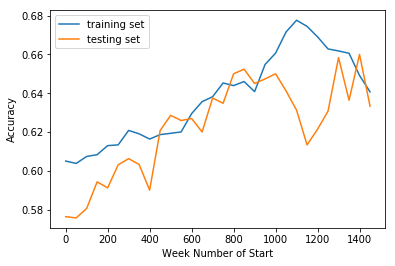

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(start_week_num,result_train,label='training set')
plt.plot(start_week_num,result_test,label='testing set')
plt.legend()
plt.xlabel('Week Number of Start')
plt.ylabel('Accuracy')
plt.show()